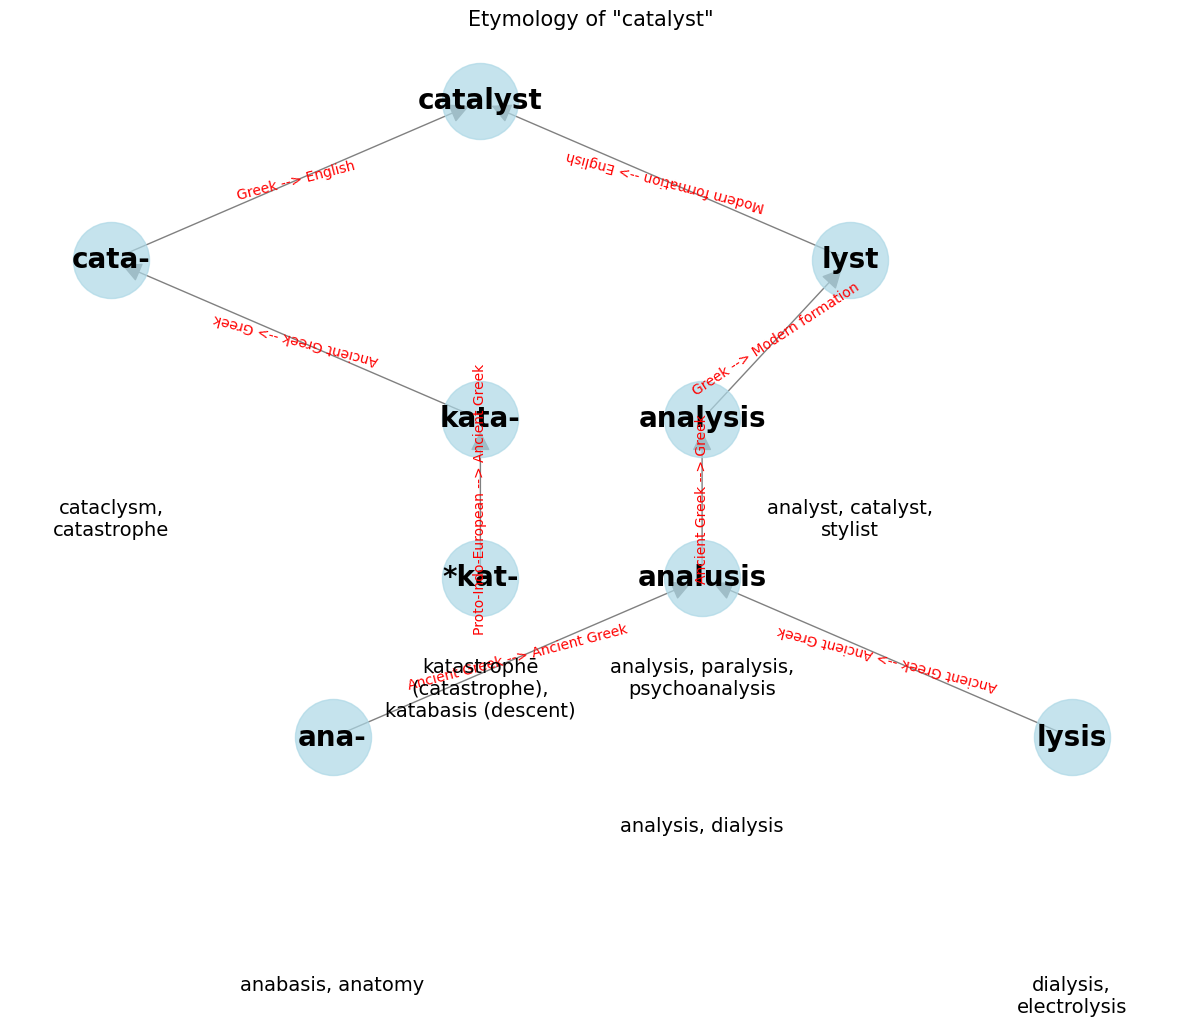

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import textwrap
import numpy as np  # For calculating text rotation


# Define the etymology data for "extraordinary"
etymology_data = {
  "word": "catalyst",
  "meaning": "a substance that increases the rate of a chemical reaction without itself undergoing any permanent chemical change.",
  "language": "English",
  "synonyms_in_other_languages": {
    "japanese": "触媒",
    "arabic": "محفز",
    "french": "catalyseur",
    "chinese": "催化剂"
  },
  "history": "The term 'catalyst' was first introduced in the early 19th century by chemist Jöns Jacob Berzelius, to describe substances that facilitate chemical reactions without being consumed.",
  "parts": [
    {
      "part": "cata-",
      "type": "prefix"
    },
    {
      "part": "lyst",
      "type": "root"
    }
  ],
  "etymology": [
    {
      "part": "cata-",
      "meaning": "down, against, back, or according to",
      "example_words": ["cataclysm", "catastrophe"],
      "language": "Greek",
      "history": "Derived from the Greek prefix 'kata-', which means down, against, back, or according to, reflecting the action of bringing about a change.",
      "tracing": ["cata- <-- kata- (Greek)"],
      "etymology": [
        {
          "part": "kata-",
          "meaning": "down, against, back, or according to",
          "language": "Ancient Greek",
          "history": "Used in various contexts in Greek to denote direction, manner, or quality, often implying a downward movement or negative connotation.",
          "example_words": ["katastrophē (catastrophe)", "katabasis (descent)"],
          "tracing": ["kata- <-- Proto-Indo-European *kat-"],
          "etymology": [
            {
              "part": "*kat-",
              "meaning": "down, towards, in the sense of downward motion",
              "language": "Proto-Indo-European",
              "history": "Theoretical construct to explain the origins of various Indo-European words related to direction or movement.",
              "example_words": [],
              "tracing": []
            }
          ]
        }
      ]
    },
    {
      "part": "lyst",
      "meaning": "a person or thing that initiates or precipitates an event",
      "example_words": ["analyst", "catalyst", "stylist"],
      "language": "Modern formation",
      "history": "Derived from the concept of causing or initiating action, often in a specific field or context. The suffix '-lyst' is not a direct derivative from Greek or Latin, but rather a modern formation to denote an agent or something that performs a specific action.",
      "tracing": ["lyst <-- analyst (English) <-- analysis (Greek)"],
      "etymology": [
        {
          "part": "analysis",
          "meaning": "a detailed examination of the elements or structure of something",
          "language": "Greek",
          "history": "From Greek 'analusis', meaning 'a breaking up, a loosening, releasing.'",
          "example_words": ["analysis", "paralysis", "psychoanalysis"],
          "tracing": ["analysis <-- analusis (Greek)"],
          "etymology": [
            {
              "part": "analusis",
              "meaning": "a breaking up, loosening",
              "language": "Ancient Greek",
              "history": "Derived from 'ana-' meaning 'up, throughout' and 'lysis' meaning 'a loosening or dissolution.'",
              "example_words": ["analysis", "dialysis"],
              "tracing": ["analusis <-- ana- (up, throughout) + lysis (a loosening)"],
              "etymology": [
                {
                  "part": "ana-",
                  "meaning": "up, back, again, anew",
                  "language": "Ancient Greek",
                  "history": "Used to denote up, back, again, or anew, implying reversal or repetition.",
                  "example_words": ["anabasis", "anatomy"],
                  "tracing": ["ana- <-- Proto-Indo-European *ana (on, upon, above)"]
                },
                {
                  "part": "lysis",
                  "meaning": "a loosening, dissolution",
                  "language": "Ancient Greek",
                  "history": "Refers to the act of loosening or breaking down, commonly used in scientific contexts.",
                  "example_words": ["dialysis", "electrolysis"],
                  "tracing": ["lysis <-- luein (to loosen) <-- Proto-Indo-European *leu- (to loosen, divide, cut apart)"]
                }
              ]
            }
          ]
        }
      ]
    }
  ]
}

# Initialize the directed graph and populate it
G = nx.DiGraph()

def add_to_graph(graph, data, parent=None):
    node_data = {key: data.get(key, '') for key in ['part', 'language', 'meaning', 'example_words']}
    node = node_data['part']
    graph.add_node(node, **node_data)
    if parent:
        graph.add_edge(parent, node)
    for child in data.get('etymology', []):
        add_to_graph(graph, child, parent=node)

# Update extraordinary_data with synonyms as example_words for the word part
etymology_data["example_words"] = list(etymology_data["synonyms_in_other_languages"].values())


add_to_graph(G, {"part": etymology_data["word"], "language": etymology_data["language"], "meaning": etymology_data["meaning"], "etymology": etymology_data["etymology"]})

# Initial positions: place the main word at an arbitrary top center, e.g., (0, 0)
pos = {etymology_data["word"]: (0, 0)}



# Function to manually set positions for child nodes to avoid overlap
def set_positions_branch_wise(graph, current_pos, parent, level=1, branch_offset=0):
    children = list(graph.successors(parent))
    num_children = len(children)
    width_between_children = 1.0 / (num_children + 1)
    for i, child in enumerate(children):
        # Horizontal position: disperse children horizontally
        x = -0.5 + width_between_children * (i + 1) + branch_offset
        # Vertical position: place lower levels further down
        y = -level * 0.1
        current_pos[child] = (x, y)
        # Recursively position the children of the current node, adjusting the branch offset
        set_positions_branch_wise(graph, current_pos, child, level + 1, branch_offset + i * 0.1)

# Apply custom positioning
set_positions_branch_wise(G, pos, etymology_data["word"])

# Adjust all positions so that the main word is at the top center of the final layout
# Find min and max x to center horizontally
min_x = min(pos.values(), key=lambda x: x[0])[0]
max_x = max(pos.values(), key=lambda x: x[0])[0]
for node in pos:
    # Centering horizontally
    pos[node] = ((pos[node][0] - min_x) / (max_x - min_x), pos[node][1])

plt.figure(figsize=(15, 10))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", arrowsize=30, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=20, font_weight="bold")

# Add edge labels (keeping your original method)
for edge in G.edges:
    source, target = edge
    mid_x, mid_y = np.mean([pos[source], pos[target]], axis=0)
    angle = np.degrees(np.arctan2(pos[target][1] - pos[source][1], pos[target][0] - pos[source][0])) + 180
    plt.text(mid_x, mid_y, f"{G.nodes[target]['language']} --> {G.nodes[source]['language']}", rotation=angle, rotation_mode='anchor', fontsize=10, color='red', ha='center', va='center')

# Add example words around nodes
for node, (x, y) in pos.items():
    examples = ", ".join(G.nodes[node].get('example_words', []))
    wrapped_text = textwrap.fill(examples, width=20)
    plt.text(x, y - 0.15, wrapped_text, fontsize=14, ha='center', va='top', wrap=True)

plt.title(f'Etymology of "{etymology_data["word"]}"', fontsize=15)
plt.axis('off')
plt.show()